In [53]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\Jan\OneDrive\13_Drive_Arbeit\04Lehre\Vorlesungen\STIR\stir\tutorials\tutorial2b\tutorial2bjl`


In [54]:
using Dojo
using Dojo: SA_F32  # From StaticArrays
using Flux
using Plots

function get_mechanism()
    origin = Origin()
    body = Sphere(0.25, 1.0)
    joint = JointConstraint(Prismatic(origin, body, [0,1,0]; parent_vertex=[0,0,0.5]))
    mechanism = Mechanism(origin, [body], [joint], timestep=0.2)

    return mechanism
end

function reset_mechanism!(mechanism)
    set_minimal_coordinates!(mechanism, mechanism.joints[1], [0])
    set_minimal_velocities!(mechanism, mechanism.joints[1], [0])
    return
end

GAINS = [2 2]

1×2 Matrix{Int64}:
 2  2

### 3.1

In [55]:
mechanism = get_mechanism()
reset_mechanism!(mechanism)

function controller!(mechanism, k)
    u = [7]
    clamp!(u,-2,2)
    set_input!(mechanism, u)
end

storage = simulate!(mechanism, 5.0, controller!, record=true)
vis = visualize(mechanism, storage)
render(vis)


┌ Info: Listening on: 127.0.0.1:8717, thread id: 1
└ @ HTTP.Servers C:\Users\Jan\.julia\packages\HTTP\enKbm\src\Servers.jl:369
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8717
└ @ MeshCat C:\Users\Jan\.julia\packages\MeshCat\QXID5\src\visualizer.jl:64


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("Background" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("top_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64], "bottom_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "Grid" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x47, 0x72, 0x69, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("floor" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("bodies" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("body_0F7a__id_1" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x30, 0x46, 0x37, 0x61, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x31], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))))), "Lights" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("PointLightPositiveX" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("<object>" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("intensity" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x58, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e], "castShadow" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x58, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "AmbientLight" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("<object>" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("intensity" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x74, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "FillLight" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("<object>" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("intensity" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x74, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))), "Axes" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x41, 0x78, 0x65, 0x73]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), Set{HTTP.WebS

### 3.2

In [56]:
mechanism = get_mechanism()
reset_mechanism!(mechanism)

x_des = [3.0,0.0]
function controller!(mechanism, k)
    x = get_minimal_state(mechanism)
    u = -GAINS * (x-x_des)
    clamp!(u,-2,2)
    set_input!(mechanism, u)
end

storage = simulate!(mechanism, 5.0, controller!, record=true)
vis = visualize(mechanism, storage)
render(vis)


┌ Info: Listening on: 127.0.0.1:8718, thread id: 1
└ @ HTTP.Servers C:\Users\Jan\.julia\packages\HTTP\enKbm\src\Servers.jl:369
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8718
└ @ MeshCat C:\Users\Jan\.julia\packages\MeshCat\QXID5\src\visualizer.jl:64


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("Background" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("top_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64], "bottom_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "Grid" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x47, 0x72, 0x69, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("floor" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("bodies" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("body_9Vwo__id_1" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x39, 0x56, 0x77, 0x6f, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x31], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))))), "Lights" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("PointLightPositiveX" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("<object>" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("intensity" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x58, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e], "castShadow" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x58, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "AmbientLight" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("<object>" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("intensity" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x74, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "FillLight" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("<object>" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("intensity" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x74, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))), "Axes" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x41, 0x78, 0x65, 0x73]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), Set{HTTP.WebS

### 3.3

In [74]:
mechanism = get_mechanism()

# data collection
steps = 25  # 5 / 0.2
N = 100
states = [[zeros(2) for _ in 1:steps] for _ in 1:N]
actions = [[zeros(1) for _ in 1:steps] for _ in 1:N]
goals = [[zeros(1) for _ in 1:steps] for _ in 1:N]

for i in 1:N
    # x_des = [-3 + 6*i/N; 0]
    x_des = [0 + 3*i/N; 0]
    function controller!(mechanism, k)
        x = get_minimal_state(mechanism)
        u = -[2 2] * (x-x_des)
        clamp!(u,-2,2)

        states[i][k] = x
        actions[i][k] = u
        goals[i][k] = [x_des[1]]

        set_input!(mechanism, u)
    end
    reset_mechanism!(mechanism)
    storage = simulate!(mechanism, 5.0, controller!, record=false)
end

In [75]:
# cat data
states = vcat(states...)
actions = vcat(actions...)
goals = vcat(goals...)

# normalize data
actions = actions / 2  # just normalize by action limit in this case, ignoring state

# training
model = Chain(Dense(3 => 8, relu), Dense(8 => 8, relu), Dense(8 => 1, relu), Dense(1 => 1, tanh), only)
data = [(SA_F32[states[i]...;goals[i]...], actions[i][1]) for i in 1:length(states)]
optim = Flux.setup(Adam(), model)

for epoch in 1:100
    indices = rand(1:length(data), 256)
    data_batch = data[indices]
    Flux.train!((m,x,y) -> (m(x) - y)^2, model, data_batch, optim)
end

In [78]:
# run policy
mechanism = get_mechanism()
reset_mechanism!(mechanism)

x_des = [-2.0,0.0]
function controller!(mechanism, k)
    x = get_minimal_state(mechanism)
    u = [model(SA_F32[x...;x_des[1]])*2]
    clamp!(u,-2,2)
    set_input!(mechanism, u)
end

storage = simulate!(mechanism, 5.0, controller!, record=true)
vis = visualize(mechanism, storage)
render(vis)

┌ Info: Listening on: 127.0.0.1:8726, thread id: 1
└ @ HTTP.Servers C:\Users\Jan\.julia\packages\HTTP\enKbm\src\Servers.jl:369
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8726
└ @ MeshCat C:\Users\Jan\.julia\packages\MeshCat\QXID5\src\visualizer.jl:64


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("Background" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("top_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64], "bottom_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "Grid" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x47, 0x72, 0x69, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("floor" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("bodies" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("body_mU3K__id_1" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6d, 0x55, 0x33, 0x4b, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x31], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))))), "Lights" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("PointLightPositiveX" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("<object>" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("intensity" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x58, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e], "castShadow" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x58, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "AmbientLight" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("<object>" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("intensity" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x74, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "FillLight" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("<object>" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("intensity" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x74, 0x2f, 0x3c, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x3e]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))), "Axes" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x41, 0x78, 0x65, 0x73]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), Set{HTTP.WebS

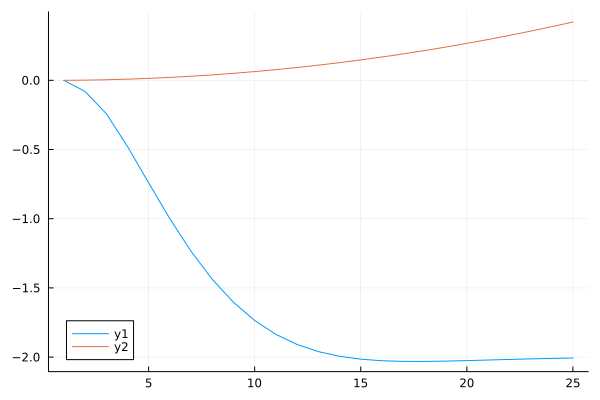

In [79]:
# comparison
mechanism = get_mechanism()
position_own = zeros(25)
position_nn = zeros(25)

function controller_own!(mechanism, k)
    x = get_minimal_state(mechanism)
    u = -GAINS * (x-x_des)
    clamp!(u,-2,2)

    position_own[k] = x[1]
    
    set_input!(mechanism, u)
end

function controller_nn!(mechanism, k)
    x = get_minimal_state(mechanism)
    u = [model(SA_F32[x...;x_des[1]])*2]
    clamp!(u,-2,2)

    position_nn[k] = x[1]
    
    set_input!(mechanism, u)
end

reset_mechanism!(mechanism)
storage = simulate!(mechanism, 5.0, controller_own!, record=false)
reset_mechanism!(mechanism)
storage = simulate!(mechanism, 5.0, controller_nn!, record=false)

plot(position_own)
plot!(position_nn)